In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

house_price_dataset = fetch_california_housing()

house_price_dataset


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [235]:

df = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

df['target'] = house_price_dataset.target

df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [262]:
X = df.drop('target',axis = 1)
Y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=3)
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((16512, 8), (4128, 8), (16512,), (4128,))

In [263]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)


In [264]:

model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [265]:

y_pred = model.predict(X_test)


In [266]:
mae = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = metrics.mean_squared_error(y_test, y_pred)    # Mean Squared Error
rmse = np.sqrt(mse)                                  # Root Mean Squared Error
r_square = metrics.r2_score(y_test, y_pred)   

print(f'Mean Absolute Error: {mae}')

print(f'Mean Squared Error: {mse}')

print(f'Root Mean Squared Error: {rmse}')

print(f'R² Score: {r_square}')


Mean Absolute Error: 0.3008583316724222
Mean Squared Error: 0.21344446760524036
Root Mean Squared Error: 0.4620005060660003
R² Score: 0.8386188269983407


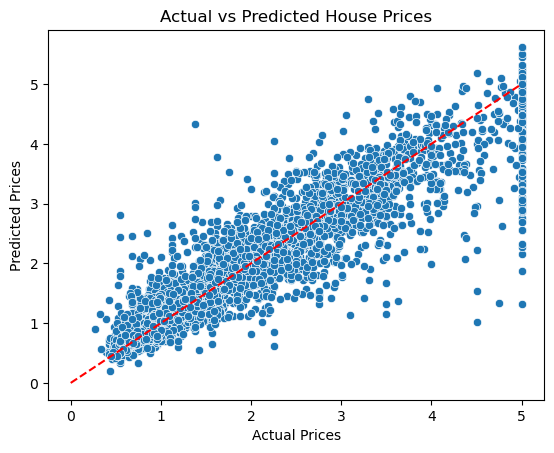

In [267]:
# y_test is orignal
# X_pred is predicted

# Note we put y_test 

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([0, 5], [0, 5], '--r')  # Diagonal line for reference
plt.show()


In [268]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [269]:

i = (3.6648, 34.0, 4.297539, 0.944072, 1230.0, 2.751678, 34.06, -117.94
)

In [270]:
i_as_np_array = np.asarray(i)
ir = i_as_np_array.reshape(1, -1)  
Prediction = model.predict(ir)
Prediction

array([1.9015429], dtype=float32)

In [256]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
14261,1.8187,36.0,4.473451,1.119469,763.0,3.376106,32.70,-117.12,0.841
18589,5.2101,18.0,5.817308,1.055288,1278.0,3.072115,37.08,-122.14,3.340
8890,3.3266,28.0,3.521020,1.021365,2313.0,1.594073,34.02,-118.50,4.833
13731,2.6129,52.0,5.777778,1.085714,601.0,1.907937,34.05,-117.18,1.370
18549,2.0172,52.0,2.540984,1.000000,1054.0,3.455738,36.96,-122.02,1.125
